외부서버에 직접 접근해서 데이터를 수집
  - key 값 이라는 개념이 존재
    - 정보를 제공하는 서버에서 사용자를 인증하는 방식

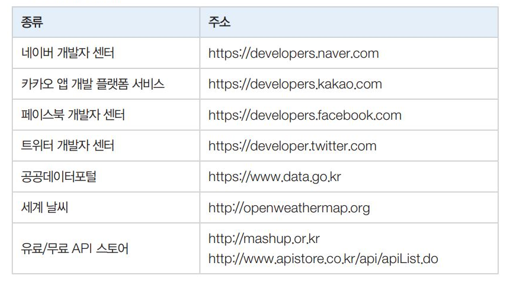

In [ ]:
import os
import sys
import urllib.request

client_id = "WtrBMYuxA8v5csUQ2qmt" # 개발자센터에서 발급받은 Client ID 값
client_secret = "hND5C76xrU" # 개발자센터에서 발급받은 Client Secret 값

encText = urllib.parse.quote("축구")  # url 방식으로 문자열을 변환시켜줌

url = "https://openapi.naver.com/v1/search/news.xml?query=" + encText   # 네이버에서 제공하는 검색을 위한 url

# 네이버에서 설정한 접근 방식  사용자 인증
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)


response = urllib.request.urlopen(request)  # 서버에 url주소를 요청해서 데이터를 전송받는다
# 코드값  성공이면 200
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()  # 성공하면 데이터를 인코딩해서 출력
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

In [2]:
response_body.decode('utf-8')

'<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - news ::&apos;축구&apos;</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Thu, 18 Jan 2024 19:40:26 +0900</lastBuildDate><total>4559206</total><start>1</start><display>10</display><item><title>황의조, 출국금지 당했다…수사관 기피신청하며 &apos;반발&apos;</title><originallink>https://www.hankyung.com/article/2024011845937</originallink><link>https://n.news.naver.com/mnews/article/015/0004938550?sid=102</link><description>불법 촬영 혐의를 받고 있는 &lt;b&gt;축구&lt;/b&gt;선수 황의조(32·노팅엄 포리스트)에 대해 경찰이 출국금지 조치를 내린 것으로 알려졌다. 서울경찰청 사이버수사대는 지난 16일 성폭력처벌법상 카메라 등 이용촬영 혐의를 받는... </description><pubDate>Thu, 18 Jan 2024 19:39:00 +0900</pubDate></item><item><title>아시안컵 2경기 연속 졸전에…中 매체, 자국팀에 “아시아 삼류”</title><originallink>https://www.mk.co.kr/article/10924509</originallink><link>https://n.news.naver.com/mnews/article/009/0005246916?sid=104</link><description>중국 &lt;b&gt;축구&lt;/b&gt;대표팀(FIFA 랭킹 7

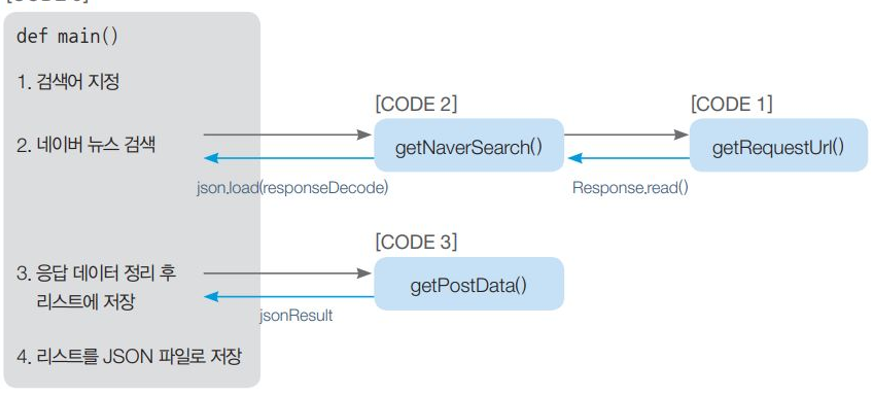

In [67]:
import os
import sys
import json
import urllib.request

client_id = "WtrBMYuxA8v5csUQ2qmt" # 개발자센터에서 발급받은 Client ID 값
client_secret = "hND5C76xrU" # 개발자센터에서 발급받은 Client Secret 값

# 네이버 api접속
def getRequestUrl(url):
  # 네이버에서 설정한 접근 방식  사용자 인증
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  try:
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()  # 성공하면 데이터를 인코딩해서 출력
        return response_body.decode('utf-8')
  except Exception as e:
    print(e)
    return None

node = 'news'
page_start = 1
display = 100
srcText = input("검색어를 입력하세요")

encText = urllib.parse.quote(srcText)  # url 방식으로 문자열을 변환시켜줌
url = "https://openapi.naver.com/v1/search/"
results = []
while True:
  try:
    parameters = f"{node}.json?query={encText}&display={display}&start={page_start}"
    url2 = url+ parameters
    jsonResponse = getRequestUrl(url2)
    results.append(json.loads(jsonResponse))
    page_start += display
  except Exception as e:
    print(e)
    break

검색어를 입력하세요아시안컵
HTTP Error 400: Bad Request
the JSON object must be str, bytes or bytearray, not NoneType


In [69]:
import pandas as pd
df = pd.DataFrame(results)
df_lists = [ pd.DataFrame(item)  for item in  df['items'] ]

In [73]:
# 세로로 합치기
total_df = pd.concat(df_lists)
total_df = total_df.reset_index(drop=True)
total_df.head()

,title,originallink,link,description,pubDate
0,"호주-시리아, 전반전 치열한 공방에도 0대0 무승부 [<b>아시안컵</b> 전반종료]",https://www.mk.co.kr/article/10924539,https://sports.news.naver.com/news.nhn?oid=410...,불구하고 <b>아시안컵</b> 조별리그 2차전 전반전서 득점을 올리지 못한채로 마쳤...,"Thu, 18 Jan 2024 21:25:00 +0900"
1,"클린스만호,'요르단 손흥민' 알타마리 막아라",https://www.idaegu.co.kr/news/articleView.html...,https://www.idaegu.co.kr/news/articleView.html...,<b>아시안컵</b> 16강행 조기 확정을 노린다. 위르겐 클린스만 감독이 지휘하는...,"Thu, 18 Jan 2024 21:24:00 +0900"
2,‘코 출혈까지 발생’ 시리아 육탄방어+투쟁심!→‘전력 우세’ 호주 쩔쩔 [아...,https://www.sportsseoul.com/news/read/1391800?...,https://sports.news.naver.com/news.nhn?oid=468...,(AFC) <b>아시안컵</b> 조별리그 B조 2차전 호주와 경기에서 전반 슛을 시...,"Thu, 18 Jan 2024 21:22:00 +0900"
3,"“기대해도 좋다”…16강 위해 ‘꼭 잡아 할’ 베트남, 신태용 감독 “죽기 살...",https://www.sportsseoul.com/news/read/1391799?...,https://sports.news.naver.com/news.nhn?oid=468...,(AFC) <b>아시안컵</b> D조 조별리그 2차전을 치른다. 인도네시아는 조별리...,"Thu, 18 Jan 2024 21:22:00 +0900"
4,"&quot;공격! 앞으로 갈거야&quot; 클린스만호, 요르단 밀집 수비 대비 훈련",http://www.newsis.com/view/?id=NISX20240118_00...,https://sports.news.naver.com/news.nhn?oid=003...,클린스만호는 18일 오후 4시(한국시간) 카타르 도하의 알 에글라 트레이닝센터에서 ...,"Thu, 18 Jan 2024 21:17:00 +0900"


In [90]:
import re
def removeHtml(x):
  temp = re.sub('[^가-힣a-zA-Z0-9]',' ',x)
  temp = temp.replace('b','')
  temp = temp.replace('quot','')
  return temp

In [95]:
total_df['title2']  = [ removeHtml(title) for title in  total_df['title'] ]
total_df['description2'] = [ removeHtml(title) for title in  total_df['description'] ]

In [ ]:
total_df.loc[:,['title2',	'description2' ] ]

In [98]:
from collections import Counter

In [ ]:
temp = 'i love you you love me?'
Counter(temp), Counter(temp.split())

In [ ]:
Counter(total_df['title2'][0].split() )

In [ ]:
cnt = Counter( ' '.join(total_df['description2'].values).split() )
result =  sorted(cnt.items(), key=lambda x: x[1],reverse=True)
remove_items = ['아시안컵','사진','포토']
# 2글자 이상인것중에  remove_items는 제거한다.
[ item   for item in  result if len(item[0]) >=2 and item[0] not in remove_items    ]

공공기관 API

In [80]:
total_df.loc[0,'title']

'호주-시리아, 전반전 치열한 공방에도 0대0 무승부 [<b>아시안컵</b> 전반종료]'